# Projeto de Ciência dos Dados 

**Professor: Fábio Roberto Miranda**

**Aluna: Giulia Araujo Castro - 2B - Engenharia Mecatrônica**

**Perguntas:**

Ao entrar na OPEP um país altera sua produção de petróleo? Há um crescimento considerável no PIB ao longo dos anos? Se sim, há uma redução na desigualdade social do país?

## A OPEP

A OPEP (Organização dos Países Exportadores de Petróleo) funciona como uma espécie de cartel que unifica as leis e preços dos barris dos principais exportadores de petróleo, buscando, assim, estabilizar o mercado de petróleo. Ou seja, os paises participantes da OPEP conseguem agregar mais valor aos seus barris e, em teoria, conseguem ganhar a mesma quantidade de dinheiro produzindo menos. 

Para saber mais, acesse o site da OPEP: https://www.opec.org/opec_web/en/about_us/23.htm 


## Explicação da hipótese e mecanismo

Sabendo do funcionamento da OPEP, em teoria, a produção de petróleo dos países não seria modificada, mas o valor agregado à cada barril será maior. Sendo assim, espera-se que o PIB cresça mais rapidamente.
Geralmente, com o crecimento do PIB e o enriquecimento do país a desigualdade social diminui. Sabemos, porém, que essa lógica não funciona com a maioria dos países exportadores de petróleo do Oriente Médio que, mesmo sendo países muito ricos, tem renda extremamente concentrada. Apresentando, assim, desigualdade extremas. 
Para os outros países da OPEP muito provavelmente essa lógica se repete. Quando governos são muito dependentes da venda de um produto há, constantemente, a criação de elites econômicas muito poderosas que submetem os governos às suas vontades e desejos, gerando cada vez mais desigualdade

#### Arrumar a frase e pegar a fonte

## Bases de dados usadas

Foram coletados 3 dados do site https://www.gapminder.org/data/

1) Produção de petróleo anual

2) Crescimento anual do PIB

3) Índice de Gini

Com esses dados podemos observar a produção de petróleo ao redor do mundo (1) e observar se a OPEP tem influência na produção de cada país. Além disso, podemos observar se há um crescimento significativo do PIB (2) e se esse crecimento ao mesmo tempo gera uma redução do índice de Gini.  

## Análise dos dados

In [1]:
# Primeiramente vamos exportar as bibliotecas necessárias 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Agora vamos abrir as planílhas do Excel e guarda-las em variáveis 

produtores_petroleo = pd.read_excel('oil_production_total.xlsx')
pib_paises = pd.read_excel('gdp_total_yearly_growth.xlsx')
gini = pd.read_excel('inequality_index_gini.xlsx')

In [3]:
#Vamos criar uma lista com os países pertencentes à OPEP

paises_OPEP = ["Angola", "Algeria", "Gabon", "Equatorial Guinea", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]

In [4]:
#Vamos criar uma coluna com valores 0 para todos os paises 

produtores_petroleo.loc[:, "opep"] = 0
pib_paises.loc[:, "opep"] = 0
gini.loc[:, "opep"] = 0

In [5]:
#Vamos agora alterar o índice das tabelas 

produtores_petroleo_idx = produtores_petroleo.set_index('country')
pib_paises_idx = pib_paises.set_index('country')
gini_idx = gini.set_index('country')

In [6]:
#Com isso obtemos as seguintes tabelas

produtores_petroleo_idx

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,opep
country,,,,,,,,,,,,,,,,,,,,,
Algeria,26500000.0,33900000.0,39100000.0,42900000.0,44800000.0,48200000.0,37100000.0,50100000.0,50900000.0,47400000.0,...,85600000.0,77200000.0,73800000.0,71700000.0,67200000,64800000,68800000,67200000,68500000,0
Angola,655000.0,631000.0,537000.0,750000.0,2460000.0,5070000.0,5720000.0,7060000.0,8180000.0,8540000.0,...,93500000.0,87600000.0,90500000.0,83800000.0,86900000,87300000,83000000,88700000,87900000,0
Argentina,13800000.0,14600000.0,16000000.0,17500000.0,18100000.0,20000000.0,21600000.0,22200000.0,21600000.0,21100000.0,...,37800000.0,34000000.0,33300000.0,30900000.0,31100000,30500000,29900000,29800000,28800000,0
Australia,346000.0,445000.0,1040000.0,1930000.0,2230000.0,8700000.0,15300000.0,16300000.0,20400000.0,20200000.0,...,24100000.0,22400000.0,24500000.0,21500000.0,21400000,17800000,19100000,17400000,15500000,0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44500000.0,50400000.0,50800000.0,45600000.0,43400000,43500000,42100000,41600000,41000000,0
Brazil,5040000.0,6160000.0,7750000.0,8510000.0,9290000.0,8790000.0,9200000.0,9030000.0,9160000.0,9550000.0,...,99100000.0,106000000.0,112000000.0,114000000.0,112000000,110000000,122000000,132000000,137000000,0
Brunei,3970000.0,4760000.0,5160000.0,6070000.0,6150000.0,6750000.0,6400000.0,9060000.0,11400000.0,9740000.0,...,8590000.0,8250000.0,8450000.0,8110000.0,7820000,6610000,6180000,6200000,5930000,0
Canada,43900000.0,48200000.0,52700000.0,57100000.0,62200000.0,70100000.0,75200000.0,86700000.0,100000000.0,94400000.0,...,153000000.0,153000000.0,160000000.0,170000000.0,183000000,195000000,209000000,216000000,218000000,0
Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6690000.0,6190000.0,6400000.0,5970000.0,5310000,4360000,4330000,3810000,3850000,0


In [7]:
pib_paises_idx

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,opep
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.400,4.56,13.600,2.500,20.200,8.040,6.980,14.8000,4.4700,0
Albania,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,...,5.530,5.77,5.850,7.240,3.280,3.360,2.860,2.6400,2.0600,0
Algeria,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,...,5.380,1.72,3.420,2.020,1.700,3.570,2.310,2.5800,2.9900,0
Andorra,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,...,7.800,4.97,0.161,-4.220,-5.060,-3.430,-2.830,NaN,NaN,0
Angola,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,...,20.500,18.60,23.200,13.800,2.390,3.450,3.870,4.9600,3.7900,0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.640,12.70,7.010,1.480,-10.700,-7.580,-1.980,3.8200,1.4600,0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.080,8.21,8.390,6.500,0.598,8.880,8.590,1.6400,3.9800,0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.400,13.20,13.700,6.860,-14.800,1.420,3.940,7.2200,3.2700,0
Australia,-0.0331,-0.0331,-0.0332,-0.0329,-0.0330,-0.0330,-0.0330,-0.0331,-0.0331,-0.0331,...,3.700,2.93,4.860,2.600,1.640,3.140,2.590,3.1900,2.4700,0


In [8]:
gini_idx

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,opep
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.2,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Argentina,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,...,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4,NaN,0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,NaN,0
Australia,NaN,NaN,31.3,NaN,NaN,NaN,32.5,NaN,NaN,NaN,...,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.5,30.3,30.8,30.5,30.8,30.5,30.5,NaN,NaN,0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Bangladesh,NaN,NaN,NaN,NaN,25.9,NaN,26.9,NaN,NaN,28.8,...,NaN,32.1,NaN,NaN,NaN,NaN,NaN,32.4,NaN,0


**Ao entrar na OPEP um país aumenta consideravelmente sua produção de petróleo?**

Para analizar essa pergunta escolhemos observar os dados de 3 países (Gabão, Equador e Nigéria) ao longos dos anos de 1965 até 2000. A escolha dos países foi feita devido aos anos de entrada na OPEP, já que muitos entraram muito próximos, ou até antes, de 1965, ou então, entraram muito recentemente, o que prejudica a análise desejada.

In [9]:
#Vamos primeiro recortar a tabela pegando apenas os países que desejamos utilizar

p3 = produtores_petroleo_idx.loc[["Gabon", "Nigeria", "Ecuador" ],:]

In [10]:
#Agora vamos recortar os anos que desejamos nessa tabela 

paises3 = p3[p3.columns[0:36]]

In [11]:
#Vamos agora transpor a tabela 

paises3_transpose = paises3.transpose()
paises3_transpose

country,Gabon,Nigeria,Ecuador
1965,1270000.0,13500000.0,429000.0
1966,1450000.0,20600000.0,375000.0
1967,3450000.0,15700000.0,322000.0
1968,4640000.0,6960000.0,269000.0
1969,5030000.0,26600000.0,214000.0
1970,5420000.0,53400000.0,214000.0
1971,5800000.0,75400000.0,214000.0
1972,6300000.0,89800000.0,4190000.0
1973,7600000.0,101000000.0,11200000.0
1974,10200000.0,111000000.0,9490000.0


Text(0.5, 1.0, 'Produção de petróleo de 1965 até 2005')

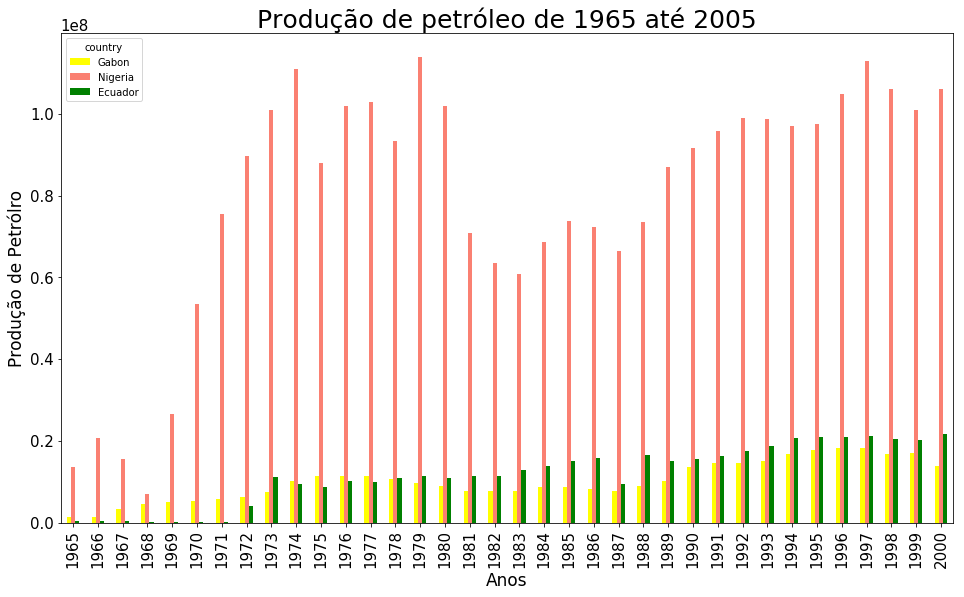

In [12]:
#Vamos agora plotar o gráfico para a vizualização dos dados 

plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
paises3_transpose.plot(kind='bar', color=('yellow', 'salmon', 'green'))
plt.ylabel('Produção de Petrólro')
plt.xlabel('Anos')
plt.title('Produção de petróleo de 1965 até 2005')

Como podemos ver para o Gabão, que entrou na OPEP em 1975 e saiu em 1994, participar do cartel não alterou a produção interna de petróleo. O país já passava por um aumento de produção e depois que entrou no cartel chegou ao seu pico diminuindo logo depois. Podemos ver também que, mesmo deixando o cartel em 1994, a produção depetróleo não é alterada. 

Para a Nigéria, que ingressou em 1971, podemos notar um alto crescimento na produção nos anos de 1972, 1973 e 1974. Porém, ao analizarmos o gráfico, nota-se que o país já apresentava um movimento alto de crescimento antes mesmo de entrar na OPEP. Sendo assim, não podemos chegar à uma conclusão se esse aumento foi ou não impulsionado pela participação na OPEP ou não. 

Em 1973 o Equador inicia a atuar como um membro da organização. Podemos notar um altíssimo aumento na prdução de petróleo nesse ano, que se manteve ao longo dos outros anos. O que talvez possa indicar que ingressar na OPEP o Equador buscou aumentar sua produção anual de petróleo. Porém, ao sair do cartel, em 1992, a produção continua a crescer em baixas taxas.    

Sendo assim, pode-se concluir que entrar na OPEP não significa aumentar a produção de petróleo de um país. 

**Análise do PIB**

In [13]:
#Vamos recortar as tabelas deixando apenas os países pertencentes à OPEP

produtores_petroleo_idx.loc[paises_OPEP, "opep"] = 1
pib_paises_idx.loc[paises_OPEP, "opep"] = 1

PRODUTORES_OPEP = produtores_petroleo_idx[(produtores_petroleo_idx.opep == 1)]
PIB_OPEP = pib_paises_idx[(pib_paises_idx.opep == 1)]

In [14]:
pib_opep = PIB_OPEP.join(PRODUTORES_OPEP, how='inner', lsuffix='_PIB', rsuffix='_petroleo')

pib_opep

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2008_petroleo,2009_petroleo,2010_petroleo,2011_petroleo,2012_petroleo,2013_petroleo,2014,2015,2016,opep_petroleo
country,,,,,,,,,,,,,,,,,,,,,
Algeria,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,...,85600000.0,77200000.0,73800000.0,71700000.0,67200000,64800000,68800000,67200000,68500000,1
Angola,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,...,93500000.0,87600000.0,90500000.0,83800000.0,86900000,87300000,83000000,88700000,87900000,1
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27200000.0,26100000.0,26100000.0,26800000.0,27100000,28200000,29800000,29100000,29300000,1
Equatorial Guinea,0.1180,0.1180,0.1180,0.1180,0.1180,0.1180,0.1180,0.1180,0.1180,0.1180,...,16100000.0,14200000.0,12600000.0,11600000.0,12700000,12400000,13100000,13500000,13100000,1
Gabon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12000000.0,12000000.0,12400000.0,12500000.0,12700000,11600000,11600000,11500000,11400000,1
Indonesia,0.3060,0.3060,0.3060,0.3060,0.3060,0.3060,0.3060,0.3060,0.3060,0.3060,...,49400000.0,48400000.0,48600000.0,46300000.0,44600000,42700000,41200000,40700000,43000000,1
Iran,0.2270,0.2270,0.2270,0.2270,0.2270,0.2270,0.2270,0.2270,0.2270,0.2270,...,216000000.0,207000000.0,212000000.0,213000000.0,181000000,170000000,174000000,182000000,216000000,1
Iraq,0.0741,0.0741,0.0742,0.0741,0.0742,0.0741,0.0741,0.0741,0.0742,0.0741,...,119000000.0,120000000.0,121000000.0,137000000.0,153000000,153000000,160000000,197000000,219000000,1
Kuwait,0.0236,0.0236,0.0236,0.0236,0.0236,0.0236,0.0236,0.0236,0.0236,0.0236,...,136000000.0,121000000.0,123000000.0,141000000.0,154000000,151000000,150000000,148000000,153000000,1


In [ ]:
pip_opep.plot.scatter(x="_PIB", y = "")